# **Prediksi Pertandingan Liga Inggris**

Dataset_2023.2024.xlsx merupkan sebuah dataset dari pertandingan liga Inggris tahun 2023/2024. dataset ini berisi 28 columns dan 760 rows. Dataset ini bisa digunakan untuk model klasifikasi dengan label result pertandingan apakah itu win lost ataupun draw.

LINK DATASET: [Premier League Match Result](https://www.kaggle.com/datasets/pourea/premier-league-match-results)

## **Import Library yang dibutuhkan**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Load Dataset**

In [ ]:
df=pd.read_excel('Dataset_2023.2024.xlsx')
df

,Team,Status,Team rating,CB,LB,RB,ST,CM,AM,LM,...,STr,CMr,AMr,LMr,DMr,LWr,RWr,RMr,Result,Round
0,Man city,Guest,7.3,2,1,1,1,0,1,0,...,1,2,0,1,0,0,0,1,Win,1
1,Burnley,Home,6.0,3,1,1,1,2,0,1,...,1,0,1,0,2,1,1,0,Lost,1
2,Arsenal,Home,7.4,2,1,1,1,3,0,0,...,1,2,0,1,0,1,1,1,Win,1
3,Nottm forest,Guest,6.5,3,0,0,1,2,0,1,...,1,3,0,0,0,1,1,0,Lost,1
4,Bournemouth,Home,6.6,2,1,1,1,0,1,0,...,1,0,1,0,2,1,1,0,Draw,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Fulham,Guest,7.3,2,1,1,1,0,1,0,...,1,2,2,1,0,0,0,1,Win,38
756,Man city,Home,7.7,2,1,1,1,0,2,0,...,1,2,0,1,0,1,1,1,Win,38
757,West ham,Guest,6.2,3,0,0,1,2,0,1,...,1,0,2,0,1,1,1,0,Lost,38
758,Sheffiled utd,Home,6.1,3,0,0,2,3,0,1,...,1,3,0,0,0,1,1,0,Lost,38


| Kolom       | Tipe Data | Deskripsi                                           |
|-------------|-----------|-----------------------------------------------------|
| Team        | String    | Nama tim sepak bola                                 |
| Status      | String    | Status tim (Home atau Guest)                        |
| Team rating | Float     | Rating keseluruhan tim                              |
| CB          | Integer   | Jumlah pemain Center Back                           |
| LB          | Integer   | Jumlah pemain Left Back                             |
| RB          | Integer   | Jumlah pemain Right Back                            |
| ST          | Integer   | Jumlah pemain Striker                               |
| CM          | Integer   | Jumlah pemain Center Midfielder                     |
| AM          | Integer   | Jumlah pemain Attacking Midfielder                  |
| LM          | Integer   | Jumlah pemain Left Midfielder                       |
| DM          | Integer   | Jumlah pemain Defensive Midfielder                  |
| RM          | Integer   | Jumlah pemain Right Midfielder                      |
| LW          | Integer   | Jumlah pemain Left Winger                           |
| RW          | Integer   | Jumlah pemain Right Winger                          |
|Rival Team Rating| Integer | Rating Keseluruhan Tim Lawan
| CBr         | Integer   | Jumlah pemain CB dari formasi lawan                 |
| LBr         | Integer   | Jumlah pemain LB dari formasi lawan                 |
| RBr         | Integer   | Jumlah pemain RB dari formasi lawan                 |
| STr         | Integer   | Jumlah pemain ST dari formasi lawan                 |
| CMr         | Integer   | Jumlah pemain CM dari formasi lawan                 |
| AMr         | Integer   | Jumlah pemain AM dari formasi lawan                 |
| LMr         | Integer   | Jumlah pemain LM dari formasi lawan                 |
| DMr         | Integer   | Jumlah pemain DM dari formasi lawan                 |
| LWr         | Integer   | Jumlah pemain LW dari formasi lawan                 |
| RWr         | Integer   | Jumlah pemain RW dari formasi lawan                 |
| RMr         | Integer   | Jumlah pemain RM dari formasi lawan                 |
| Result      | String    | Hasil pertandingan (Win, Lost, Draw)                |
| Round       | Integer   | Putaran atau minggu ke berapa pertandingan berlangsung |




## **Exploratory Data Analysis (EDA)**

In [ ]:
# Mengecek apakah ada data yang kosong
df.isnull().sum()

,0
Team,0
Status,0
Team rating,0
CB,0
LB,0
RB,0
ST,0
CM,0
AM,0
LM,0


**Hasil** : Berdasarkan hasil pengecekan tidak terdapat data yang kosong atau nan,maka dari itu kita bisa teruskan ke data preparation lainnya

In [ ]:
# Mengecek tipe data dan info perkolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               760 non-null    object 
 1   Status             760 non-null    object 
 2   Team rating        760 non-null    float64
 3   CB                 760 non-null    int64  
 4   LB                 760 non-null    int64  
 5   RB                 760 non-null    int64  
 6   ST                 760 non-null    int64  
 7   CM                 760 non-null    int64  
 8   AM                 760 non-null    int64  
 9   LM                 760 non-null    int64  
 10  DM                 760 non-null    int64  
 11  LW                 760 non-null    int64  
 12  RW                 760 non-null    int64  
 13  RM                 760 non-null    int64  
 14  Rival team rating  760 non-null    float64
 15  CBr                760 non-null    int64  
 16  LBr                760 non

**Hasil** :Berdasarkan info kolom terdapat 28 kolom dan memiliki type data 23 berbentuk intejer 2 float dan 3 object.

In [ ]:
# Melihat jumlah baris dan kolom
df.shape

(760, 28)

**Hasil** :Penguatan dari sebelumnya terdapat 760 baris dan 28 kolom

In [ ]:
# Melihat apakah ada outlier
df.describe()

,Team rating,CB,LB,RB,ST,CM,AM,LM,DM,LW,...,RBr,STr,CMr,AMr,LMr,DMr,LWr,RWr,RMr,Round
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,6.911184,2.226316,0.803947,0.803947,1.164474,1.414474,0.713158,0.325000,0.875000,0.673684,...,0.803947,1.164474,1.414474,0.713158,0.325000,0.875000,0.673684,0.673684,0.326316,19.500000
std,0.483911,0.418721,0.397270,0.397270,0.374484,1.311970,0.682424,0.468683,0.993473,0.469173,...,0.397270,0.374484,1.311970,0.682424,0.468683,0.993473,0.469173,0.469173,0.469173,10.973078
min,5.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.500000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,6.900000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,19.500000
75%,7.300000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,29.000000
max,8.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,38.000000


**Hasil** Tidak terdapat outlier dan semua data dipastikan aman

In [ ]:
# Cek apakah ada data duplikat
df.duplicated().sum()

np.int64(0)

**Hasil** Tidak terdapat duplikat

In [ ]:
# Encoding kolom 'Team'
le_team = LabelEncoder()
df['Team_encoded'] = le_team.fit_transform(df['Team'])
# Encoding kolom 'Team'
le_status = LabelEncoder()
df['Status_encoded'] = le_status.fit_transform(df['Status'])

**Hasil** :Melakukan Pengubahan data berbentuk object ke angka

In [ ]:
# Lihat tabel apakah sudah ada kolom hasil encoded
df

,Team,Status,Team rating,CB,LB,RB,ST,CM,AM,LM,...,AMr,LMr,DMr,LWr,RWr,RMr,Result,Round,Team_encoded,Status_encoded
0,Man city,Guest,7.3,2,1,1,1,0,1,0,...,0,1,0,0,0,1,Win,1,12,0
1,Burnley,Home,6.0,3,1,1,1,2,0,1,...,1,0,2,1,1,0,Lost,1,5,1
2,Arsenal,Home,7.4,2,1,1,1,3,0,0,...,0,1,0,1,1,1,Win,1,0,1
3,Nottm forest,Guest,6.5,3,0,0,1,2,0,1,...,0,0,0,1,1,0,Lost,1,15,0
4,Bournemouth,Home,6.6,2,1,1,1,0,1,0,...,1,0,2,1,1,0,Draw,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Fulham,Guest,7.3,2,1,1,1,0,1,0,...,2,1,0,0,0,1,Win,38,9,0
756,Man city,Home,7.7,2,1,1,1,0,2,0,...,0,1,0,1,1,1,Win,38,12,1
757,West ham,Guest,6.2,3,0,0,1,2,0,1,...,2,0,1,1,1,0,Lost,38,18,0
758,Sheffiled utd,Home,6.1,3,0,0,2,3,0,1,...,0,0,0,1,1,0,Lost,38,16,1


**Hasil** : Terdapat Kolom baru bernama team_encoded dan status_encoded dimana hasil encoding pada kolom team dan status yang awalnya berbentuk object menjadi angka.

In [ ]:
# Cek Rejumlah Result karena ingin dijadikan label
df['Result'].value_counts()

,count
Result,
Win,298
Lost,298
Draw,164


**Hasil** : Terdapat 3 kelas yang dipakai yaitu win lost dan draw

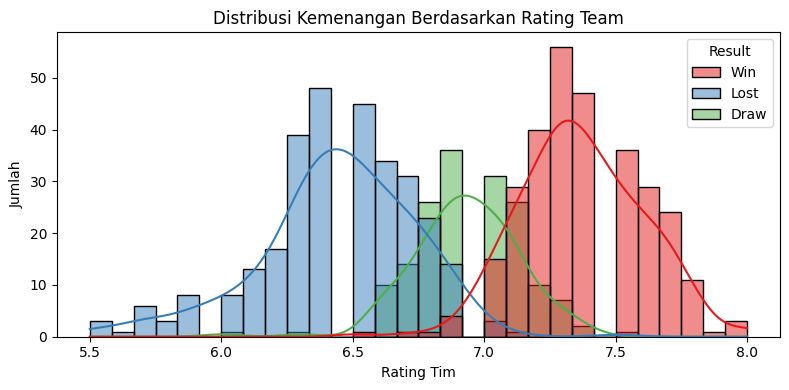

In [ ]:
# Visualisasi untuk melihat kemenangan berdasarkan rating team
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Team rating', hue='Result', bins=30, kde=True, palette='Set1')
plt.title("Distribusi Kemenangan Berdasarkan Rating Team")
plt.xlabel("Rating Tim")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

**Hasil** : Visualisasi distribusi kemenangan berdasarkan rating. Ditemukan rating tim memiliki pengaruh signifikan terhadap hasil pertandingan.

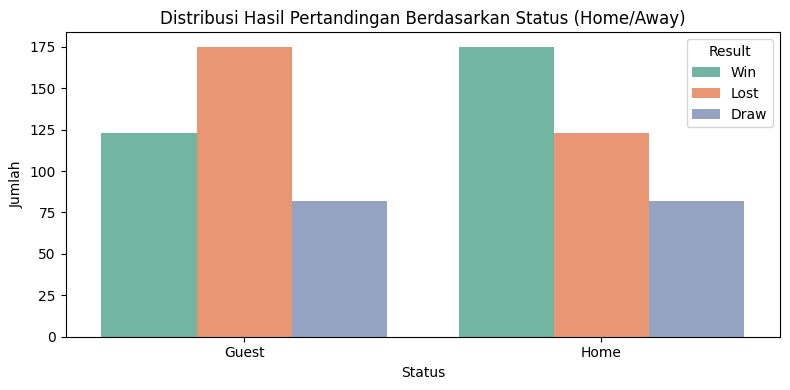

In [ ]:
# Viusalisasi Hasil Pertandingan Berdasarkan Status (Home/Away)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Status', hue='Result', palette='Set2')
plt.title("Distribusi Hasil Pertandingan Berdasarkan Status (Home/Away)")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


**Hasil** : Visualisasi distribusi berdasarkan status bertanding. Mendapatkan hasil Tim yang bermain sebagai tuan rumah (Home) memiliki kemungkinan menang lebih tinggi dibandingkan tim tamu (Guest).

## **Mengambil Fitur dan Membagi Menjadi Data Latih dan Data Uji**

In [ ]:
# Ambil variabel fitur selain result,karena untuk label,sedangkan team dan status untuk karena sudah di encoding menjadi team dan status encoded
X = df.drop(columns=['Result','Team','Status'], axis=1)
y = df['Result']

**Hasil**: x= mengambil semua kolom kecuali team,status dan result. y=kolom label yang akan digunakan

In [ ]:
# Membagi dataset dengan 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

**Hasil**: Setelah di split data dibagi menjadi 80% data latih dan 20% data uji

In [ ]:
# Melihat hasil splitting
print(X.shape, X_train.shape, X_test.shape)

(760, 27) (608, 27) (152, 27)


**Hasil**:(608 baris,27 kolom) merupakan data latih yang dipakai,dan (152 baris, 27 kolom) sebagai data uji.

## **Membuat Model Machine Learning**

### Menggunakan Algoritma RandomForest

Random Forest dalah algoritma ensemble yang membangun banyak pohon keputusan (decision tree) dan menggabungkan  hasilnya untuk meningkatkan akurasi dan mencegah overfitting. Cara Kerja:

    - Bootstrap Sampling: Dataset dilatih secara acak (sampling dengan pengembalian) untuk membuat beberapa subset data (bootstrap samples).
    - Pembangunan Pohon: Untuk setiap subset, dibangun satu pohon keputusan menggunakan sebagian fitur secara acak.
    - Voting (Klasifikasi) atau Rata-rata (Regresi):
    - Untuk klasifikasi: Setiap pohon memberikan suara (vote), dan kelas dengan suara terbanyak adalah hasil akhir.
    - Untuk regresi: Mengambil rata-rata dari hasil semua pohon.


In [ ]:
# Model yang Dibuat Pertama adalah RandomForest
model = RandomForestClassifier(
   n_estimators=100,         # Jumlah pohon dalam hutan (semakin banyak → hasil lebih stabil)
    max_depth=None,           # Tidak ada batasan kedalaman pohon (berpotensi overfitting)
    min_samples_split=2,      # Minimum sampel untuk membagi node (default: 2)
    min_samples_leaf=1,       # Minimum sampel di setiap daun pohon (default: 1 → pohon sangat fleksibel)
    random_state=42           # Seed untuk hasil yang konsisten setiap kali dijalankan
)

model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

**Hasil**: Model Random Forest Berhasil di Buat

In [ ]:
# Prediksi Dengan Algoritma Random Forest
y_pred_RF = model.predict(X_test)
y_pred_RF

array(['Win', 'Win', 'Lost', 'Win', 'Draw', 'Draw', 'Win', 'Win', 'Draw',
       'Win', 'Lost', 'Win', 'Win', 'Lost', 'Lost', 'Lost', 'Win', 'Win',
       'Lost', 'Lost', 'Lost', 'Win', 'Win', 'Lost', 'Win', 'Lost',
       'Draw', 'Lost', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win',
       'Draw', 'Draw', 'Win', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win',
       'Draw', 'Lost', 'Draw', 'Win', 'Draw', 'Win', 'Draw', 'Lost',
       'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Lost', 'Lost', 'Lost',
       'Win', 'Win', 'Win', 'Lost', 'Lost', 'Lost', 'Lost', 'Win', 'Lost',
       'Win', 'Lost', 'Win', 'Draw', 'Win', 'Lost', 'Win', 'Win', 'Win',
       'Win', 'Draw', 'Draw', 'Lost', 'Lost', 'Win', 'Win', 'Draw',
       'Draw', 'Win', 'Lost', 'Lost', 'Draw', 'Win', 'Win', 'Lost', 'Win',
       'Win', 'Lost', 'Win', 'Win', 'Draw', 'Lost', 'Lost', 'Win', 'Lost',
       'Win', 'Win', 'Win', 'Win', 'Lost', 'Draw', 'Lost', 'Win', 'Lost',
       'Win', 'Win', 'Lost', 'Draw', 'Lost', 'Draw', 'Lost', 'W

**Hasil**: Hasil dari Prediksi model random forest

In [ ]:
# Evaluasi Random Forest
print("Akurasi Testing:", accuracy_score(y_test, y_pred_RF))
print("\nClassification Report:\n", classification_report(y_test, y_pred_RF))

Akurasi Testing: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

        Draw       0.57      0.48      0.52        27
        Lost       0.90      0.93      0.92        60
         Win       0.88      0.91      0.89        65

    accuracy                           0.84       152
   macro avg       0.78      0.77      0.78       152
weighted avg       0.83      0.84      0.84       152



**Hasil**: Hasil Akurasi Random Forest sebanyak 0.84 atau 84%

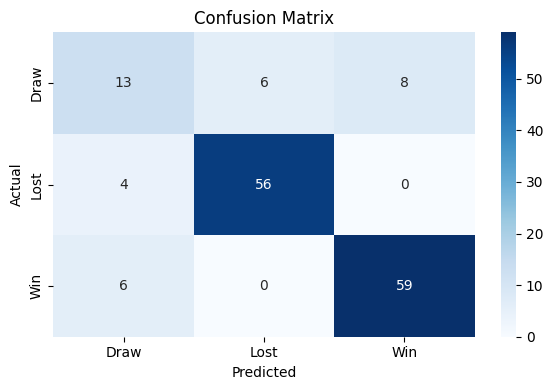

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)
labels = sorted(y_test.unique())  # untuk label sumbu jika y_test adalah DataFrame/Series dengan kategori

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


**Hasil**: Merupakan tampilan confution matrix dimana draw actual di prediksi sebanyak 13 kali,lost aktual 56 kali,dan win actual 59 kali.

### Menggunakan Naive Bayes

Naive Bayes adalah algoritma klasifikasi berdasarkan Teorema Bayes dengan asumsi kuat (naive) bahwa fitur-fitur bersifat independen satu sama lain. Cara Kerja :

    - Menghitung Probabilitas Kelas: Misalnya menghitung P(Positif) dan P(Negatif) dari data latih.
    - Menghitung Probabilitas Kondisional: Misalnya P(Fitur | Kelas) untuk setiap fitur.
    - Menerapkan Teorema Bayes.
    - Prediksi: Memilih kelas dengan nilai probabilitas terbesar.

In [ ]:
# Selanjutnya Dengan Algoritma Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


GaussianNB()

**Hasil**: Berhasil membuat model naive bayes

In [ ]:
# Prediksi Model Naive Bayes
y_pred_NB = model_NB.predict(X_test)
y_pred_NB

array(['Win', 'Win', 'Lost', 'Draw', 'Draw', 'Draw', 'Win', 'Draw',
       'Draw', 'Win', 'Draw', 'Win', 'Win', 'Lost', 'Lost', 'Lost', 'Win',
       'Win', 'Lost', 'Lost', 'Lost', 'Win', 'Win', 'Draw', 'Win', 'Lost',
       'Lost', 'Lost', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win', 'Win',
       'Draw', 'Win', 'Lost', 'Win', 'Draw', 'Win', 'Lost', 'Win', 'Draw',
       'Lost', 'Draw', 'Win', 'Draw', 'Win', 'Draw', 'Lost', 'Lost',
       'Win', 'Lost', 'Win', 'Lost', 'Lost', 'Draw', 'Lost', 'Win', 'Win',
       'Win', 'Lost', 'Lost', 'Lost', 'Lost', 'Win', 'Lost', 'Win',
       'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win', 'Win', 'Win', 'Win',
       'Lost', 'Lost', 'Lost', 'Lost', 'Win', 'Win', 'Draw', 'Draw',
       'Win', 'Lost', 'Lost', 'Win', 'Win', 'Win', 'Lost', 'Win', 'Win',
       'Lost', 'Win', 'Win', 'Draw', 'Lost', 'Lost', 'Win', 'Lost', 'Win',
       'Win', 'Win', 'Win', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win',
       'Win', 'Lost', 'Draw', 'Lost', 'Draw', 'Lost', 'Lo

**Hasil**: Hasil dari prediksi menggunakan model naive bayes

In [ ]:
# Evaluasi Naive Bayes
print("Akurasi Testing:", accuracy_score(y_test, y_pred_NB))
print("\nClassification Report:\n", classification_report(y_test, y_pred_NB))

Akurasi Testing: 0.7960526315789473

Classification Report:
               precision    recall  f1-score   support

        Draw       0.44      0.41      0.42        27
        Lost       0.87      0.90      0.89        60
         Win       0.86      0.86      0.86        65

    accuracy                           0.80       152
   macro avg       0.72      0.72      0.72       152
weighted avg       0.79      0.80      0.79       152



**Hasil**: Hasil akurasinya adalah 0.79

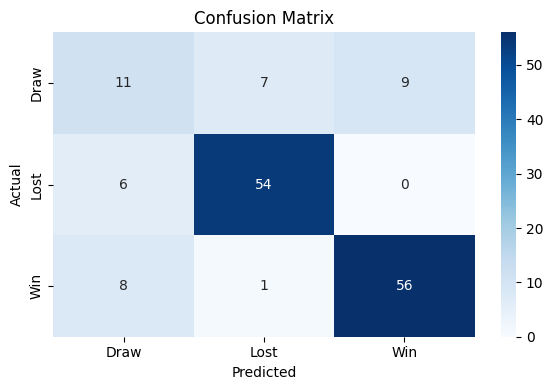

In [ ]:
# Membuat confusion matrix NB
cm = confusion_matrix(y_test, y_pred_NB)
labels = sorted(y_test.unique())  # untuk label sumbu jika y_test adalah DataFrame/Series dengan kategori

# Visualisasi confusion matrix NB
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


**Hasil**: Berdasarkan model naive bayes draw actual 11 prediksi benar,lost aktual 54 prediksi benar, dan win actual 56 prediksi benar.

### Model SVM

SVM(Support Vector Machine) adalah algoritma klasifikasi yang mencari garis pemisah (hyperplane) terbaik yang memisahkan kelas data dengan margin terbesar. Cara Kerja:

    - SVM mencari hyperplane (garis di 2D, bidang di 3D, dst.) yang memaksimalkan margin antara dua kelas.
    - Support Vectors: Titik data paling dekat dengan hyperplane yang menentukan posisinya.
    - Untuk data yang tidak linear, SVM menggunakan kernel trick (misalnya RBF, polynomial) untuk memetakan data ke dimensi lebih tinggi agar bisa dipisahkan secara linear.

In [ ]:
# Membuat Model SVM
svm_model = SVC(
   kernel='rbf',         # Jenis kernel yang digunakan; 'rbf' cocok untuk data non-linear
    C=1.0,                # Parameter regularisasi; semakin tinggi → penalti kesalahan makin besar
    gamma='scale',        # Koefisien kernel; 'scale' menghitung otomatis berdasarkan fitur
    probability=True,     # Mengaktifkan prediksi probabilitas (dibutuhkan untuk evaluasi seperti ROC AUC)
    random_state=42       # Seed untuk hasil yang konsisten pada percobaan berulang
)

svm_model.fit(X_train,y_train)

SVC(probability=True, random_state=42)

**Hasil**: Berhasil membuat model svm

In [ ]:
# Lakukan Prediksi SVM
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array(['Win', 'Win', 'Lost', 'Lost', 'Lost', 'Lost', 'Win', 'Win', 'Lost',
       'Win', 'Lost', 'Win', 'Win', 'Lost', 'Lost', 'Lost', 'Win', 'Win',
       'Lost', 'Lost', 'Lost', 'Win', 'Win', 'Win', 'Win', 'Lost', 'Lost',
       'Lost', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Lost', 'Win', 'Win',
       'Win', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win', 'Win', 'Lost',
       'Lost', 'Win', 'Lost', 'Win', 'Win', 'Lost', 'Lost', 'Win', 'Win',
       'Win', 'Lost', 'Win', 'Win', 'Lost', 'Win', 'Win', 'Lost', 'Lost',
       'Lost', 'Lost', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win',
       'Lost', 'Win', 'Lost', 'Win', 'Win', 'Lost', 'Win', 'Lost', 'Lost',
       'Lost', 'Lost', 'Win', 'Win', 'Lost', 'Lost', 'Win', 'Lost',
       'Lost', 'Win', 'Win', 'Win', 'Lost', 'Win', 'Lost', 'Win', 'Win',
       'Win', 'Win', 'Lost', 'Lost', 'Win', 'Lost', 'Win', 'Win', 'Win',
       'Win', 'Lost', 'Win', 'Lost', 'Win', 'Lost', 'Win', 'Win', 'Lost',
       'Win', 'Lost', 'Lost', 'Lost', 'Lost', 'L

**Hasil**: Hasil prediksi dengan model SVM

In [ ]:
# Evaluasi SVM
print("Akurasi Testing:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Akurasi Testing: 0.7039473684210527

Classification Report:
               precision    recall  f1-score   support

        Draw       0.00      0.00      0.00        27
        Lost       0.71      0.88      0.79        60
         Win       0.70      0.83      0.76        65

    accuracy                           0.70       152
   macro avg       0.47      0.57      0.52       152
weighted avg       0.58      0.70      0.64       152



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Hasil**: Model svm memiliki akurasi testing 0.70,tetapi tidak dapat memprediksi hasil draw.


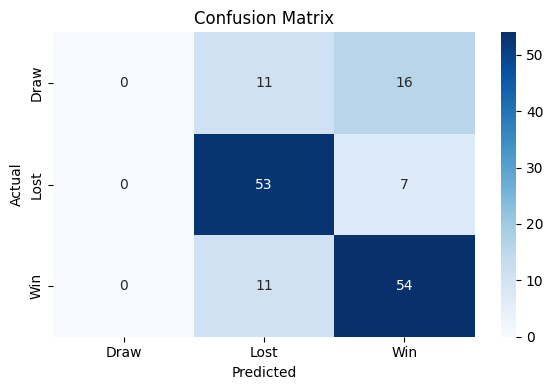

In [ ]:
# Membuat confusion matrix SVM
cm = confusion_matrix(y_test, y_pred_svm)
labels = sorted(y_test.unique())  # untuk label sumbu jika y_test adalah DataFrame/Series dengan kategori

# Visualisasi confusion matrix SVM
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


**Hasil**: Model SVM tidak dapat memprediksi hasil draw,kemudian 53 prediksi benar lost,dan 54 prediksi benar tim yang win

##  **Analsis Hasil Evaluasi Model Klasifikasi**

 Berdasarkan hasil evaluasi dengan menggunakan ke-3 model klasifikasi dapat disimpulkan :

 1. Algoritma Random Forest lebih baik dengan hasil prediksi diangka 84%,sedangkan Naive Bayes 80%, dan SVM 70%.

 2. Alasan Algortima Random Forest lebih baik karena :

    - Tahan terhadap overfitting.
    - Bisa menangani banyak fitur tanpa perlu feature selection.
    - Memberikan feature importance.

3. Meskipun hasil Random Forest lebih bagus, algoritma ini belum maksimal untuk melihat hasil draw, karena hasil dari matriks evaluasi melihatkan hasil 57%. Tetapi hal tersebut juga bisa dikarenakan nilai draw lebih sedikit dibangdingkan win dan lost.
